In [2]:
import numpy as np

# Define the matrix and RHS vector
A = np.array([[1, 0, -1],
              [0, 1,  3],
              [0, 0, -2]], dtype=float)
b = np.array([0, 0, 1], dtype=float)

# Solve the system
solution = np.linalg.solve(A, b)
print(solution)

[-0.5  1.5 -0.5]


In [3]:
# Define the matrix and RHS vector
A = np.array([[1, 0, 1],
              [2, 0,  -3],
              [-2, 1, 0]], dtype=float)
b = np.array([0, 1, 0], dtype=float)

# Solve the system
solution = np.linalg.solve(A, b)
print(solution)

[ 0.2  0.4 -0.2]


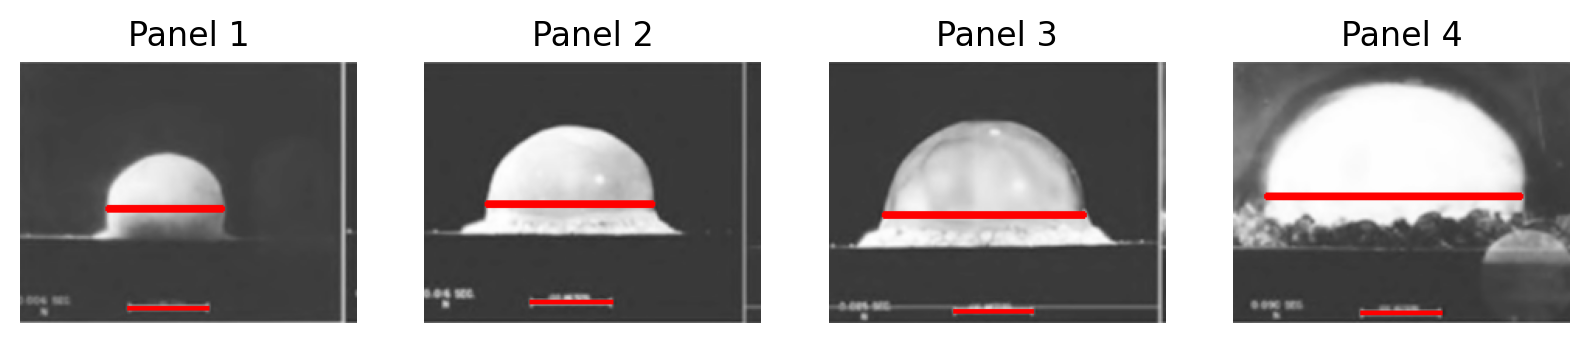

Relative (longer/shorter) bar length ratios: [1.4528301886792452, 2.037037037037037, 2.5384615384615383, 3.150943396226415]


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("brr patapim.png")

# Convert to RGB
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split into 4 panels
h, w, _ = rgb.shape
panel_width = w // 4
panels = [rgb[:, i*panel_width:(i+1)*panel_width, :] for i in range(4)]

ratios = []

for idx, panel in enumerate(panels):
    # Create mask for pure red (255,0,0)
    lower_red = np.array([200, 0, 0])   # allow tolerance
    upper_red = np.array([255, 50, 50])
    mask = cv2.inRange(panel, lower_red, upper_red)

    # Find contours of red bars
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    lengths = []
    for cnt in contours:
        x, y, w_box, h_box = cv2.boundingRect(cnt)
        lengths.append(w_box)  # horizontal length of bar

    if len(lengths) >= 2:
        lengths = sorted(lengths, reverse=True)
        ratio = lengths[0] / lengths[1]
        ratios.append(ratio)
    else:
        ratios.append(None)
plt.figure(figsize=(10,4), dpi=200)
for idx, panel in enumerate(panels):
    plt.subplot(1,4,idx+1)
    plt.imshow(panel)
    plt.title(f"Panel {idx+1}")
    plt.axis("off")


plt.show()

print("Relative (longer/shorter) bar length ratios:", ratios)


In [31]:
radii = 100*np.array(ratios) / 2
times = np.array([6,16,25,90])*1e-3
rho = 1
print("r(m)",radii)
print("t(s)",times)

E = rho * radii**5  / times**2
print("E(J)",E)

tnt_ton = 4.184e9 
E_tnt = E / tnt_ton
print("E (tonTNT)",E_tnt)

r(m) [ 72.64150943 101.85185185 126.92307692 157.54716981]
t(s) [0.006 0.016 0.025 0.09 ]
E(J) [5.61851829e+13 4.28158611e+13 5.27014959e+13 1.19830676e+13]
E (tonTNT) [13428.58099309 10233.23640519 12595.95981206  2864.02190103]


In [35]:
r  = 33.2 
ly = 9.4607e15 
E = 1e44
rho = 2e-21 

t = np.sqrt((r*ly)**5 * rho / E)
print(t)

tyr = t / 365.25 / 24 / 60 / 60 
print(tyr)

247268266973.62103
7835.458557482857
